Кармелюк Тимофій Ігорович <br>
Група: АнД-41 <br>
16.12.2021

### Практичне завдання з дисципліни "Нейронні мережі"
#### ВАРІАНТ: {6}


Практичне завдання з дисципліни <br>
Нейронні мережі <br>
ВАРІАНТ № {6} <br>
Завдання: <br>
Розробити Jupyter Notebook для вирішення завдання класифікації на основі наборів даних:
- #1 {https://keras.io/api/datasets/cifar10/}
- #2 ([https://drive.google.com/drive/folders/15MdqvRMl8YPFCbemyiLdUcX5SL4A5mx2?usp=sharing])

Забезпечити виконання наступних етапів:
1. Завантаження та попередній аналіз даних.
2. Вирішення завдання класифікації для набору даних #1 з використанням Feed-forward NN. <br>
    +.(для отримання оцінки "добре") +CNN.
3. Вирішення завдання класифікації для набору даних #2 з використанням: <br>
   3.1. CNN (Кількість фільтрів: {}, Метод оптимізації: {})<br>
   3.2. Моделі {} репозиторію Tensorflow Hub<br>
4.(для отримання оцінки "відмінно", за умови виконання п.2+) 
    Здійснити точне настроювання моделі 3.2 з використанням: {}           
5. Графічне відображення тренування моделей.
6. Порівняння отриманих результатів для набору даних #2.
7. Висновки.

Структура звітного документу:<br>
Заголовок роботи (Markdown: П.І.Б., група, назва роботи (Практичне завдання іспиту з дисципліни...), дата складання.)<br>
Етапи роботи (Номер та назва етапу (частини етапу),  код з коментарями.)<br>

Використати технології: Tensorflow, Google Colab.<br>
Результати викласти у форматі [your_surname].ipynb у папку Exam репозиторію GitHub.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 463s 3us/step


#### Data analysis 

In [20]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [58]:
flat_y = [ item for elem in y_train for item in elem]
flat_y_val = [ item for elem in y_val for item in elem]
set(flat_y_val)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

##### Encode target variables

In [59]:
target_depth = len(set(flat_y))

In [60]:
y_train_ohe = tf.one_hot(flat_y, target_depth)
y_val_ohe = tf.one_hot(flat_y_val, target_depth)

In [62]:
y_train_ohe

<tf.Tensor: shape=(50000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)>

In [63]:
callbacks_list = [
    tf.keras.callbacks.ReduceLROnPlateau(patience=2),
    tf.keras.callbacks.TensorBoard(log_dir="./logs")
]

In [64]:
def plotModelHistory(h):
    fig, ax = plt.subplots(1, 2, figsize=(15,4))
    ax[0].plot(h.history['loss'])   
    ax[0].plot(h.history['val_loss'])
    ax[0].legend(['loss','val_loss'])
    ax[0].title.set_text("Train loss vs Validation loss")

    ax[1].plot(h.history['categorical_accuracy'])   
    ax[1].plot(h.history['val_categorical_accuracy'])
    ax[1].legend(['categorical_accuracy','val_categorical_accuracy'])
    ax[1].title.set_text("Train accuracy vs Validation accuracy")
    plt.show()

    print("Max. Training Accuracy", max(h.history['categorical_accuracy']))
    print("Max. Validaiton Accuracy", max(h.history['val_categorical_accuracy']))

#### Feedforward Neural Network 

In [65]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(target_depth, activation='softmax')
])

In [66]:
%%time
model1.compile(optimizer=tf.keras.optimizers.Adam(), 
               loss=tf.keras.losses.categorical_crossentropy, 
               metrics=tf.keras.metrics.CategoricalAccuracy())

history1 = model1.fit(x_train, y_train_ohe,
                      batch_size=64,
                      epochs=5,
                      validation_data=(x_val, y_val_ohe), 
                      callbacks=callbacks_list)

Epoch 1/5
782/782 [==============================] - 5s 6ms/step - loss: 8.2610 - categorical_accuracy: 0.1072 - val_loss: 2.3068 - val_categorical_accuracy: 0.0996 - lr: 0.0010
Epoch 2/5
782/782 [==============================] - 4s 5ms/step - loss: 2.3046 - categorical_accuracy: 0.0993 - val_loss: 2.3040 - val_categorical_accuracy: 0.1000 - lr: 0.0010
Epoch 3/5
782/782 [==============================] - 4s 5ms/step - loss: 2.3037 - categorical_accuracy: 0.0987 - val_loss: 2.3032 - val_categorical_accuracy: 0.1003 - lr: 0.0010
Epoch 4/5
782/782 [==============================] - 4s 5ms/step - loss: 2.3037 - categorical_accuracy: 0.0981 - val_loss: 2.3027 - val_categorical_accuracy: 0.1002 - lr: 0.0010
Epoch 5/5
782/782 [==============================] - 4s 5ms/step - loss: 2.3034 - categorical_accuracy: 0.0989 - val_loss: 2.3033 - val_categorical_accuracy: 0.1000 - lr: 0.0010
CPU times: user 48.9 s, sys: 7.5 s, total: 56.4 s
Wall time: 21.6 s


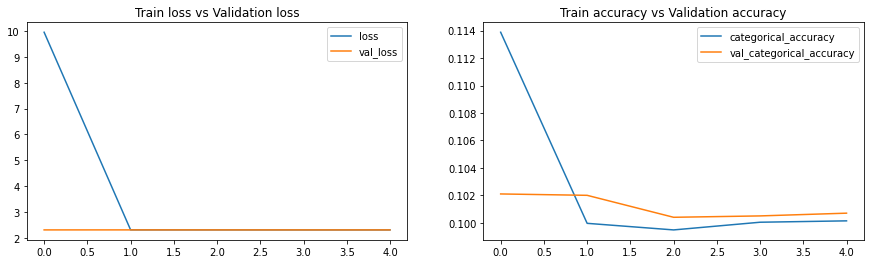

Max. Training Accuracy 0.11388000100851059
Max. Validaiton Accuracy 0.10209999978542328


In [53]:
plotModelHistory(history1)

#### CNN

In [71]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=(3, 3),
                           padding='same',
                           activation='relu',
                           input_shape=x_train.shape[1:] + (1,)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=(3, 3),
                           padding='same',
                           activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(filters=128,
                           kernel_size=(3, 3),
                           padding='same',
                           activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(target_depth, activation='softmax')
])

ValueError: Input 0 of layer "max_pooling2d_6" is incompatible with the layer: expected ndim=4, found ndim=5. Full shape received: (None, 32, 32, 3, 32)

In [ ]:
%%time
model2.compile(optimizer=tf.keras.optimizers.Adam(),
               loss=tf.keras.losses.categorical_crossentropy,
               metrics=tf.keras.metrics.CategoricalAccuracy())

history2 = model2.fit(x_train, y_train_ohe,
                      batch_size=64,
                      epochs=5,
                      validation_data=(x_val, y_val_ohe),
                      callbacks=callbacks_list)

In [72]:
plotModelHistory(history2)

NameError: name 'history2' is not defined

#### Transfer learning 

https://tfhub.dev/ 

In [35]:
model_url = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5'

In [48]:
def create_model(model_url, num_classes=10, input_shape=None):
    
    model = tf.keras.Sequential([
        hub.KerasLayer(model_url,
                       trainable=False,
                       input_shape=input_shape),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    return model

In [49]:
transfered_model = create_model(model_url, num_classes=target_depth, input_shape=x_train.shape[1:] + (3,))

In [ ]:
transfered_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

history_transfered_model = transfered_model.fit(train_data_augmented,
                                  epochs=10,
                                  validation_data=test_data,
                                  callbacks=callbacks_list)